## Clustering Grocery Items
Online shops often sell tons of different items and this can become very messy very quickly!
Data science can be extremely useful to automatically organize the products in categories so that they can be easily found by the customers.
The goal of this challenge is to look at user purchase history and create categories of items that are likely to be bought together and, therefore, should belong to the same section.

## Challenge Description
Company XYZ is an online grocery store. In the current version of the website, they have manually grouped the items into a few categories based on their experience.
However, they now have a lot of data about user purchase history. Therefore, they would like to put the data into use!
This is what they asked you to do:

### This is what they asked you to do:

-- The company founder wants to meet with some of the best customers to go through a focus group with them. 
    You are asked to send the ID of the following customers to the founder:
    
        * the customer who bought the most items overall in her lifetime for each item
        * the customer who bought that product the most
        


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
item_to_id= pd.read_csv('./grocery/item_to_id.csv')

In [3]:
item_to_id

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


In [4]:
item_to_id.shape

(48, 2)

In [5]:
# We have 48 objects and each customer can have 

In [6]:
purchases = pd.read_csv('./grocery/purchase_history.csv')

In [7]:
purchases.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [8]:
purchases.shape

(39474, 2)

# Percentage of unique shoppers


In [9]:
len(purchases['user_id'].unique())*1.0/purchases.shape[0] * 100

63.041495668034656

## The customer who bought the most items overall in her lifetime for each item


In [10]:
purchases['count']=1

# A.) Customer with the most purchase interactions


In [11]:
purchases.groupby('user_id').sum().reset_index().sort_values('count',ascending= False).head(1)

,user_id,count
512,31625,7


## B.) Customer her bought _the most individual items_ over a lifetime

In [12]:
sep_purch = purchases['id'].str.join(sep ='').str.get_dummies(sep=',')
purchase_all =pd.concat([purchases['user_id'],sep_purch],axis =1)

In [13]:
item_to_id

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


In [14]:
purchase_all.head()

,user_id,1,10,11,12,13,14,15,16,17,...,44,45,46,47,48,5,6,7,8,9
0,222087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1343649,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,404134,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1110200,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,224107,1,0,0,1,1,0,0,1,0,...,1,0,0,1,1,1,0,1,0,0


In [15]:
purchase_all.groupby('user_id').sum().sum(axis=1).reset_index().max()

user_id    1499974
0               72
dtype: int64

In [16]:
# To split by item we need to break up each row 
# Merge max value and id
max_customer_df = pd.merge(purchase_all.groupby('user_id').sum().idxmax().reset_index(),purchase_all.groupby('user_id').sum().max().reset_index(),on ='index')

max_customer_df.head()

,index,0_x,0_y
0,1,31625,4
1,10,618914,4
2,11,367872,3
3,12,557904,3
4,13,653800,4


In [17]:
item_to_id['Item_id']=item_to_id['Item_id'].astype('int')
item_to_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


# Customers who bought the most of each item

In [18]:
max_customer_df['index']=max_customer_df['index'].astype('int')
item_name_count = pd.merge(max_customer_df, item_to_id, left_on ='index', right_on='Item_id')
item_name_count.columns  = ['item_id','user_id','count','item_name','item_id_2']
item_name_count.sort_values('count',inplace=True,ascending = False)
item_name_count.head(10)

,item_id,user_id,count,item_name,item_id_2
39,45,1198106,5,cauliflower,45
15,23,920002,5,tea,23
9,18,917199,5,laundry detergent,18
32,39,599172,5,sandwich loaves,39
11,2,31625,5,lettuce,2
0,1,31625,4,sugar,1
34,40,38872,4,berries,40
25,32,109578,4,apples,32
27,34,305916,4,tortillas,34
29,36,269335,4,ice cream,36


## -- Cluster items based on user co-purchase history. That is, create clusters of products that have the highest probability of being bought together. The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.

In [28]:
## Starting with finding the frequent item sets and the association rules of objects

In [29]:
feature_columns = purchase_all.columns[purchase_all.columns != 'user_id']
X= purchase_all[feature_columns]

In [30]:
item_to_id['Item_name']=item_to_id['Item_name'].astype('string',inplace = True)

In [31]:
item_to_id.dtypes

Item_name    object
Item_id       int64
dtype: object

In [32]:
new_cols = []
for i in X.columns:
    new_cols.append(item_to_id[item_to_id['Item_id'] == int(i)].iloc[0,0])

In [33]:
X.columns = new_cols

In [34]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [35]:
frequent_itemsets = apriori(X, min_support=0.07, use_colnames=True)

In [51]:
frequent_itemsets.head()

,support,itemsets
0,0.231013,[sugar]
1,0.224426,[carrots]
2,0.082839,[shampoo]
3,0.220272,[bagels]
4,0.144399,[eggs]


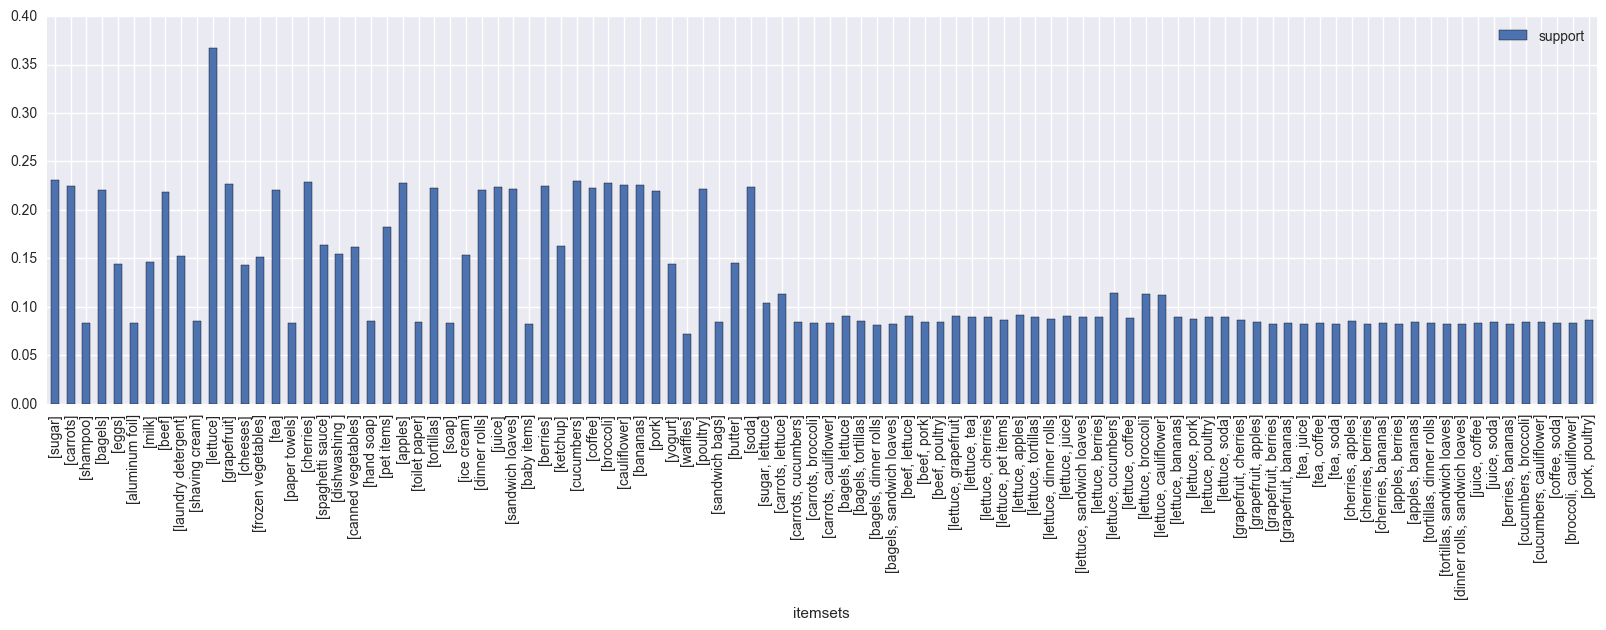

In [48]:
frequent_itemsets.plot(kind = 'bar',x='itemsets',rot = 90,figsize =(20,5))

In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedants,consequents,support,confidence,lift
0,(lettuce),(berries),0.366646,0.244386,1.086607
1,(berries),(lettuce),0.224908,0.398401,1.086607
2,(lettuce),(bagels),0.366646,0.245284,1.113554
3,(bagels),(lettuce),0.220272,0.408281,1.113554
4,(lettuce),(cauliflower),0.366646,0.305327,1.353907
5,(cauliflower),(lettuce),0.225516,0.496405,1.353907
6,(lettuce),(soda),0.366646,0.245146,1.097652
7,(soda),(lettuce),0.223337,0.402450,1.097652
8,(tea),(coffee),0.220981,0.374183,1.681524
9,(coffee),(tea),0.222526,0.371585,1.681524


In [38]:
rules['antecedants']= rules['antecedants'].apply(lambda x: list(x)[0])
rules['consequents']= rules['consequents'].apply(lambda x: list(x)[0])

In [30]:
ant_dict = {}
for i in rules['antecedants']:
    cons_array = []
    for j in rules['consequents']:
        if j != i:
            cons_array.append(j)
    ant_dict[i] = cons_array

In [31]:
print(ant_dict)

{'pork': ['berries', 'lettuce', 'bagels', 'lettuce', 'cauliflower', 'lettuce', 'soda', 'lettuce', 'coffee', 'tea', 'bananas', 'berries', 'tortillas', 'lettuce', 'bananas', 'apples', 'bananas', 'cherries', 'berries', 'cherries', 'cucumbers', 'carrots', 'juice', 'lettuce', 'beef', 'poultry', 'apples', 'lettuce', 'cauliflower', 'broccoli', 'apples', 'berries', 'cucumbers', 'broccoli', 'soda', 'tea', 'cauliflower', 'carrots', 'beef', 'bagels', 'dinner rolls', 'berries', 'grapefruit', 'soda', 'coffee', 'cucumbers', 'cauliflower', 'grapefruit', 'cherries', 'tortillas', 'sandwich loaves', 'tortillas', 'bagels', 'tea', 'lettuce', 'carrots', 'lettuce', 'sandwich loaves', 'dinner rolls', 'coffee', 'juice', 'broccoli', 'lettuce', 'pet items', 'lettuce', 'bagels', 'sandwich loaves', 'bananas', 'grapefruit', 'tortillas', 'dinner rolls', 'juice', 'tea', 'poultry', 'apples', 'cherries', 'lettuce', 'poultry', 'soda', 'juice', 'coffee', 'lettuce', 'beef', 'lettuce', 'lettuce', 'sandwich loaves', 'sugar

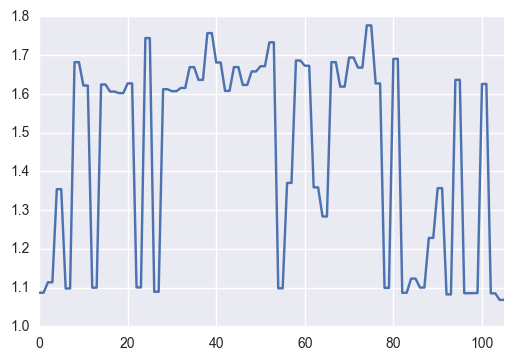

In [52]:
rules['lift'].plot()

In [25]:
# lifts = rules.groupby(['antecedants']).sum().reset_index()['lift']

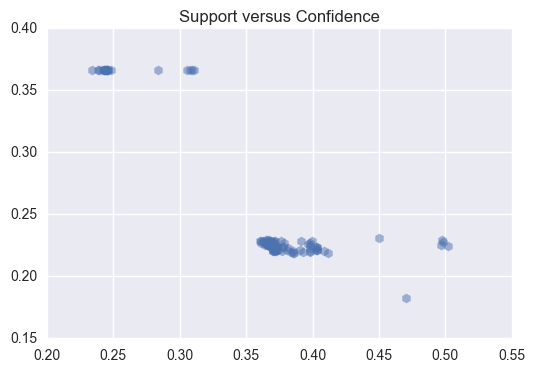

In [53]:
plt.plot(rules['confidence'],rules['support'],'h',alpha = 0.5)
plt.title('Support versus Confidence')

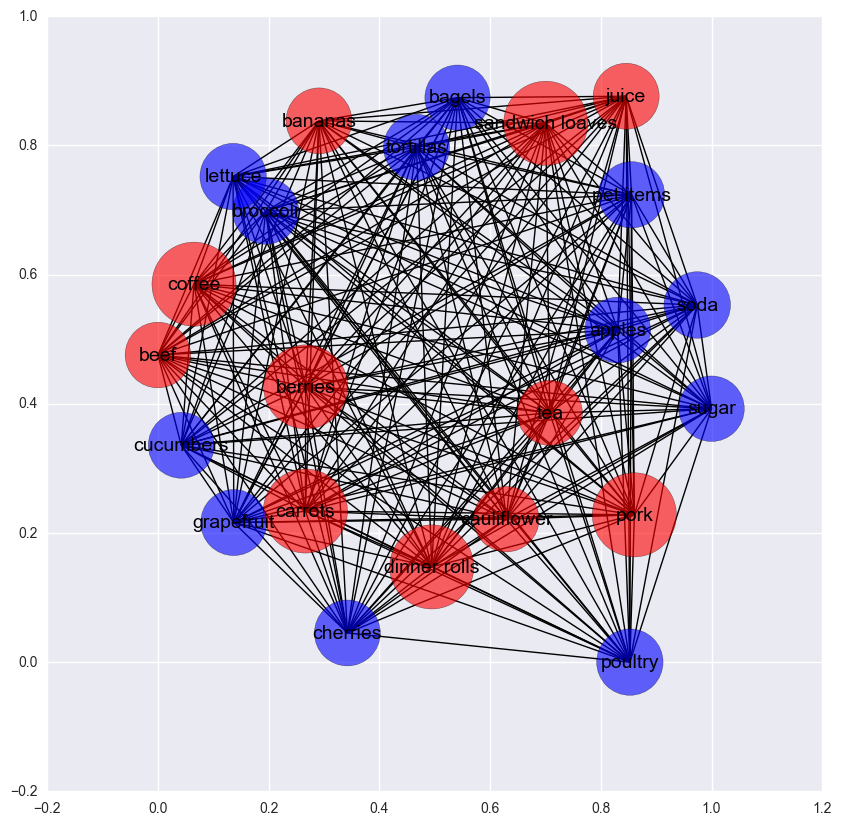

In [36]:
import networkx as nx
plt.figure(figsize = (10,10))
G = nx.Graph()

for key,val in ant_dict.items():
    for v in val:
        node1 = ant_dict[key]
        G.add_edge(key,v)
        
color_map = []
for c in rules['lift']:
    if c >1.5:
        color_map.append('blue')
    else:
        color_map.append('red')
pos = nx.spring_layout(G,k=3,iterations=5)
# do stuff to pos if you want offsets

nx.draw_networkx_nodes(G,pos,node_size = rules['support']*10000,alpha=0.6,node_color=color_map)
nx.draw_networkx_edges(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos, font_size = 14, with_labels = True,alpha = 0.9)
plt.show()

 A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

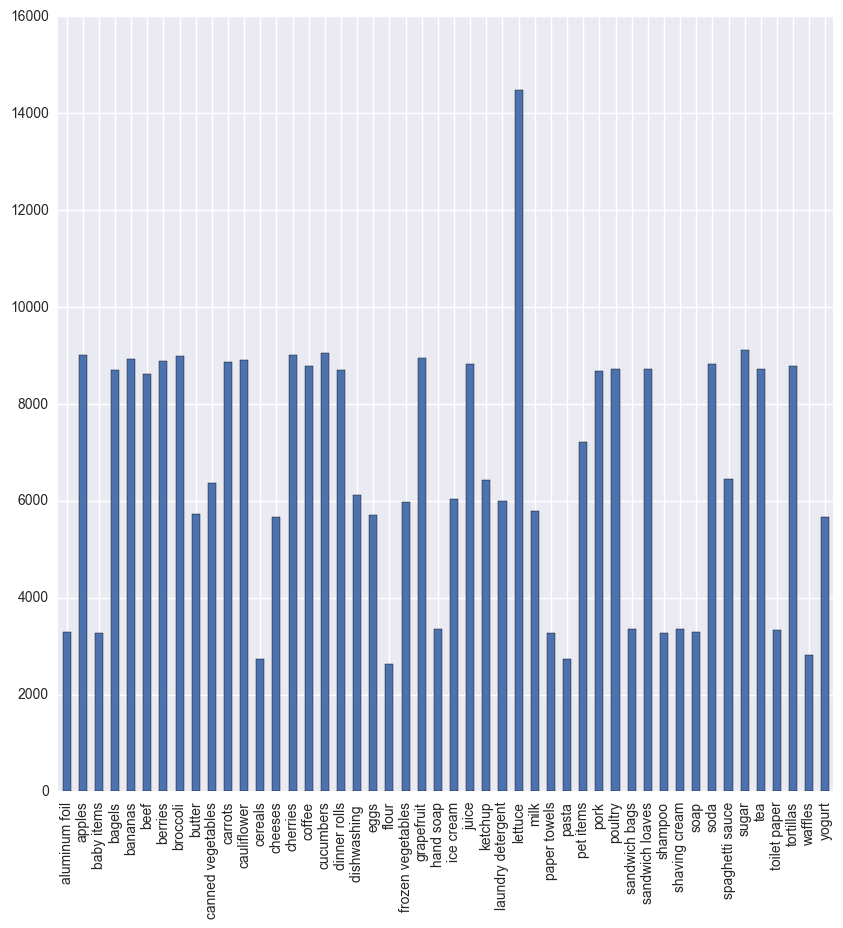

In [37]:
# calculate occurrence(support) for every product in all transactions
product_support_dict = {}
id_split = X
plt.figure(figsize = (10,10))
for column in id_split:
    product_support_dict[column] = sum(X[column]>0)
#visualise support
pd.Series(product_support_dict).plot(kind="bar")
plt.show()

In [38]:
ls

Grocery_Store.ipynb  grocery.zip
grocery/             plot.png


In [58]:
# Attemping to cluster itemes -- this tells us more about users then it does our items
X2 =purchase_all[feature_columns]
from sklearn.cluster import KMeans
from pandas.tools.plotting import parallel_coordinates
import numpy as np
kmeans = KMeans(n_clusters=3, random_state=0).fit(X2)
X2['label']=kmeans.labels_
kmeans.cluster_centers_
# Perform parallel coordinate plot

array([[ 0.26665327,  0.1815533 ,  0.07696172,  0.08871697,  0.24394655,
         0.16437255,  0.09494625,  0.17472119,  0.24153522,  0.17592686,
         0.10207977,  0.33497438,  0.55360193,  0.16125791,  0.18004622,
         0.2437456 ,  0.09464483,  0.5692756 ,  0.18306038,  0.18054858,
         0.1851703 ,  0.0958505 ,  0.20526474,  0.07856928,  0.07766503,
         0.56143876,  0.09575003,  0.24284135,  0.09936703,  0.18145283,
         0.25138149,  0.24394655,  0.24927158,  0.09243444,  0.55340098,
         0.19049533,  0.17954386,  0.24866874,  0.17462072,  0.16829097,
         0.55109012,  0.24886969,  0.17371647,  0.08077966,  0.24535316,
         0.09494625,  0.16668341,  0.24615694],
       [ 0.32227529,  0.46034453,  0.08783899,  0.11043834,  0.30615726,
         0.18454716,  0.09935187,  0.18625277,  0.30163739,  0.19870374,
         0.10250725,  0.71396896,  0.16288589,  0.18642333,  0.19785093,
         0.30556029,  0.10549207,  0.15708682,  0.21635681,  0.19674228,
   

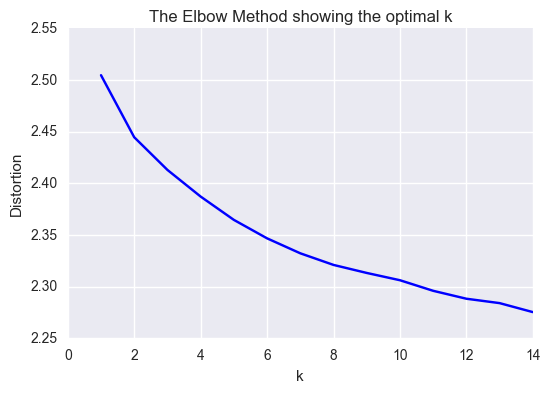

In [137]:
# clustering dataset
# determine k using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
 
# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

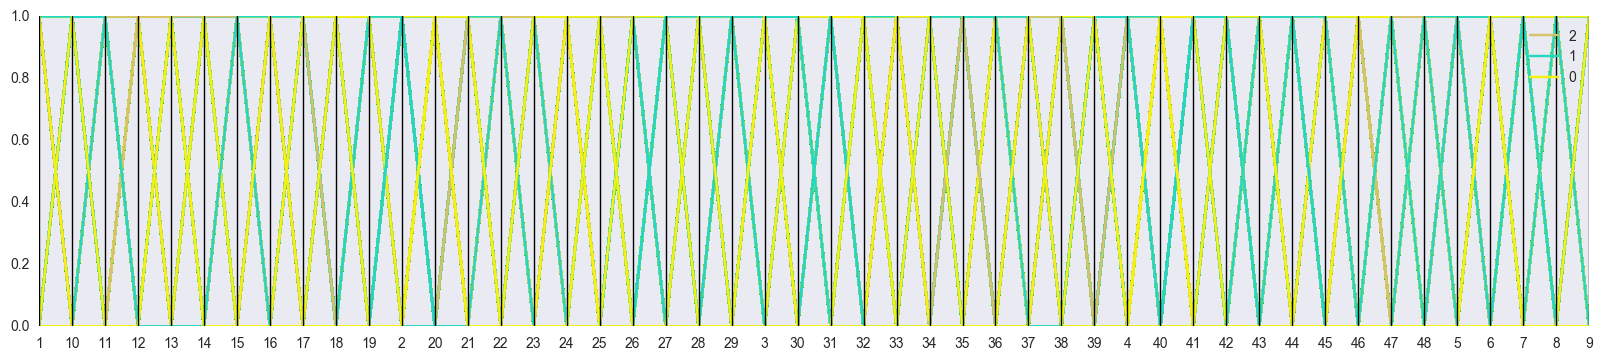

In [57]:
plt.figure(figsize = (20,4))
parallel_coordinates(X2,'label')
plt.show()

In [41]:
X.shape

(39474, 48)

In [40]:
X.head()

,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum foil,milk,beef,laundry detergent,...,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich bags,butter,soda
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,1,1,0,0,1,0,1,...,1,0,0,1,1,1,0,1,0,0


In [122]:
tran_X = X.T
X_tran = tran_X#.ix[:, tran_X.columns != 'index']
tran_X.groupby('index').sum()

KeyError: 'index'

In [148]:
# import sklearn metrics for distances, we will use the cosine similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances


dists = cosine_similarity(X.T,X.T)
dists_named = pd.DataFrame(dists,columns = X.T.index)
dists_named.index = dists_named.columns

In [149]:
dists_named

,sugar,carrots,cereals,shampoo,bagels,eggs,aluminum foil,milk,beef,laundry detergent,...,broccoli,cauliflower,bananas,pork,yogurt,waffles,poultry,sandwich bags,butter,soda
sugar,1.000000,0.251667,0.179378,0.159687,0.247741,0.211385,0.154117,0.211946,0.250068,0.221174,...,0.255933,0.252724,0.254783,0.256130,0.204936,0.171653,0.249597,0.168620,0.205530,0.256630
carrots,0.251667,1.000000,0.143153,0.150308,0.239956,0.200955,0.153580,0.197708,0.242387,0.209446,...,0.369648,0.367998,0.247696,0.237741,0.204536,0.135920,0.235836,0.155273,0.202764,0.240566
cereals,0.179378,0.143153,1.000000,0.081330,0.138339,0.111541,0.090549,0.120060,0.139913,0.117612,...,0.137540,0.135909,0.137386,0.142345,0.112568,0.143158,0.140110,0.092023,0.115931,0.142482
shampoo,0.159687,0.150308,0.081330,1.000000,0.153969,0.134807,0.093726,0.125338,0.157211,0.133651,...,0.149661,0.161436,0.144786,0.157275,0.126304,0.094232,0.155345,0.105556,0.126280,0.156448
bagels,0.247741,0.239956,0.138339,0.153969,1.000000,0.201421,0.151090,0.204782,0.238196,0.206150,...,0.246821,0.239489,0.235828,0.240778,0.206456,0.136994,0.237475,0.151166,0.205943,0.240769
eggs,0.211385,0.200955,0.111541,0.134807,0.201421,1.000000,0.120706,0.258847,0.194227,0.160224,...,0.200295,0.197100,0.196469,0.201856,0.263080,0.104814,0.204844,0.121414,0.259438,0.195802
aluminum foil,0.154117,0.153580,0.090549,0.093726,0.151090,0.120706,1.000000,0.118240,0.153564,0.136357,...,0.154384,0.148583,0.149164,0.153264,0.119602,0.086180,0.152468,0.176638,0.126992,0.159160
milk,0.211946,0.197708,0.120060,0.125338,0.204782,0.258847,0.118240,1.000000,0.201765,0.168082,...,0.194151,0.200715,0.203982,0.196608,0.275002,0.111997,0.195223,0.116456,0.265940,0.205053
beef,0.250068,0.242387,0.139913,0.157211,0.238196,0.194227,0.153564,0.201765,1.000000,0.206544,...,0.241543,0.245110,0.240289,0.385120,0.202836,0.134693,0.383368,0.154926,0.201770,0.238390
laundry detergent,0.221174,0.209446,0.117612,0.133651,0.206150,0.160224,0.136357,0.168082,0.206544,1.000000,...,0.204488,0.204424,0.204343,0.207136,0.171403,0.121862,0.206842,0.135086,0.171937,0.209956


In [156]:
song_name = 'coffee'
p = dists_named[song_name].sort_values(ascending = False)
mask = p.index.isin([song_name])
p = p[~mask]
p[p>0][0:5]

tea        0.372882
juice      0.372770
soda       0.372046
lettuce    0.310326
sugar      0.255980
Name: coffee, dtype: float64